**Amplitude Inversion Effect**

1. Import libraries:

In [1]:
import quantumaudio
from quantumaudio.tools import test_signal
from quantumaudio.tools import plot

2. Generate signal and encode it:

Encoding scheme:
Quantum State Modulation

Encoded Circuit:


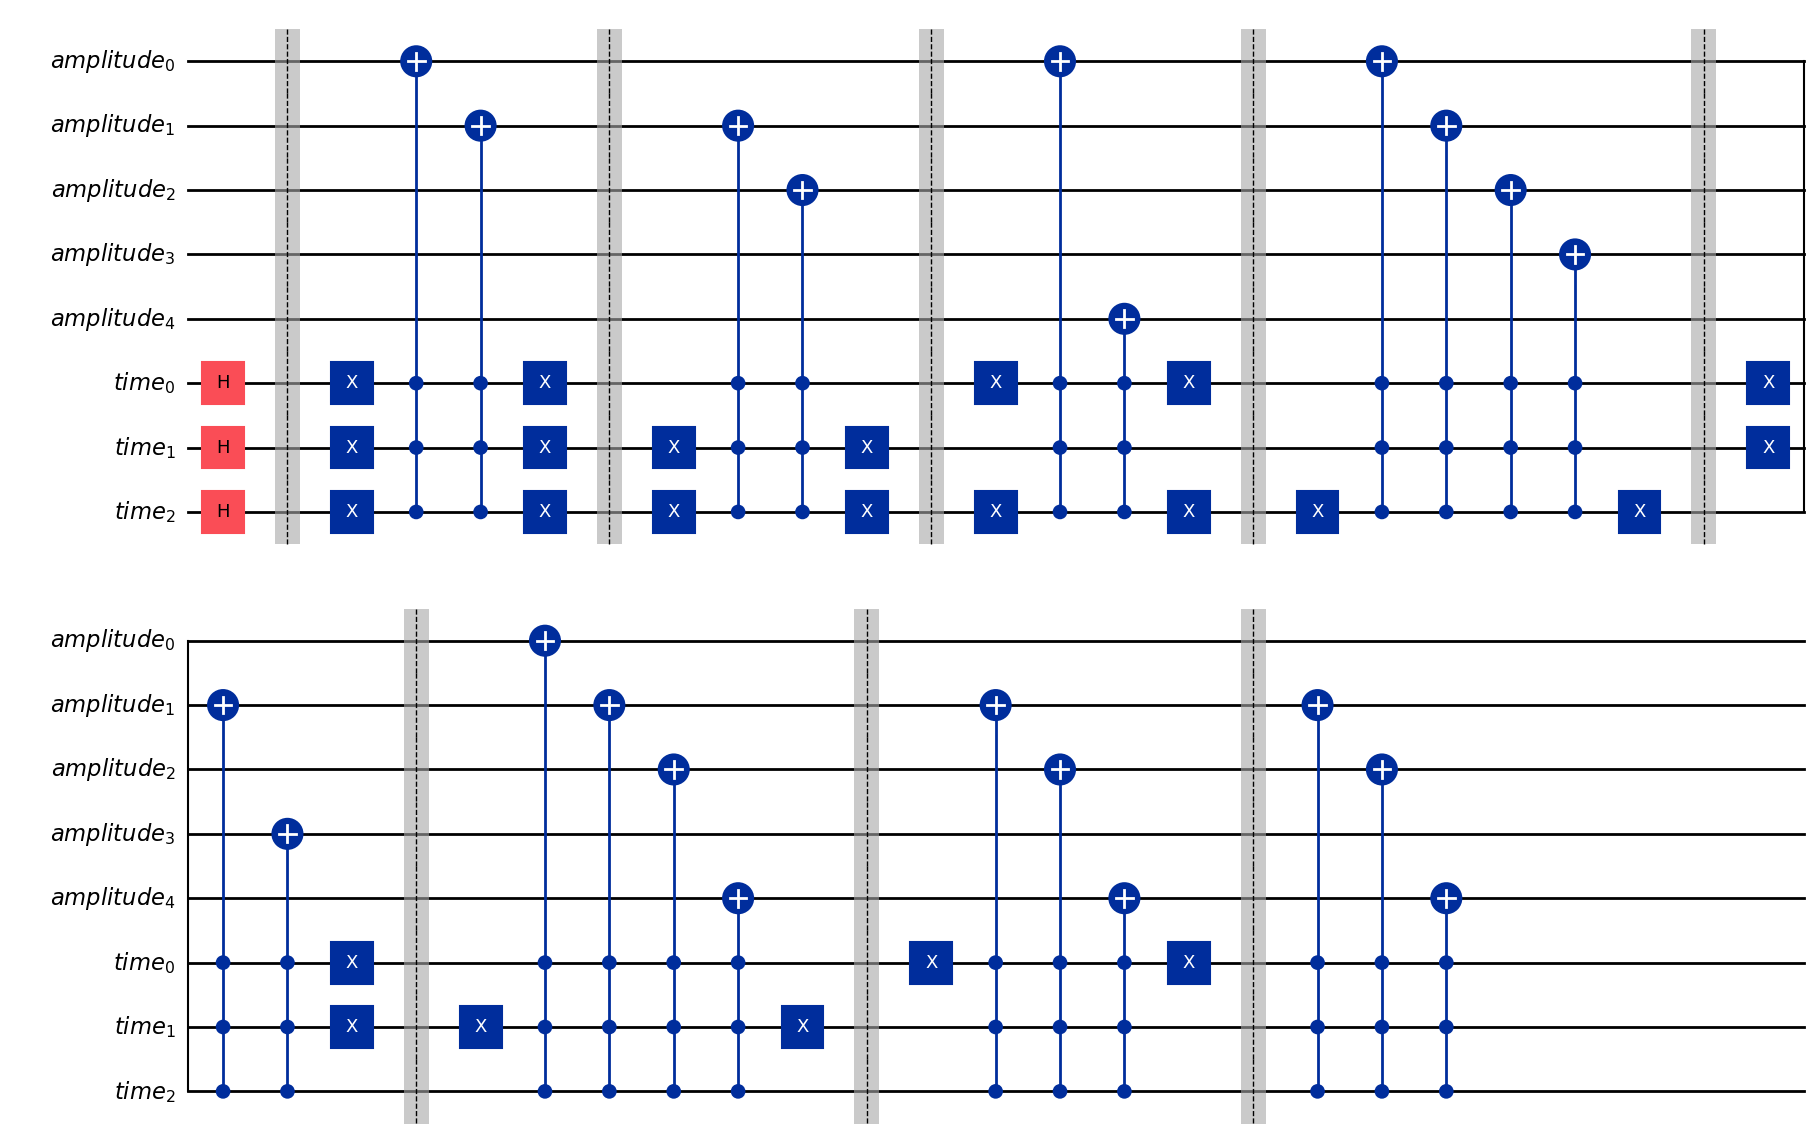

In [3]:
num_samples = 8  # change this to any power of 2 (e.g., 2, 4, 8, 16, ...). These are the time samples
qubit_depth = 5  # number of amplitude qubits in the circuit
signal = test_signal(num_channels=1, num_samples=num_samples)  # import test signal. 4 samples require 2 qubits for the time
print("Encoding scheme:")
scheme = quantumaudio.load_scheme('qsm', qubit_depth=qubit_depth)  # load the QSM scheme. qubit_depth is the number of amplitude qubits
encoded_circuit = scheme.encode(signal, verbose=0, measure=False)
print("\nEncoded Circuit:")
encoded_circuit.draw(output='mpl')

2. Amplitude Inversion Effect:


Encoded Circuit with Amplitude Inversion:


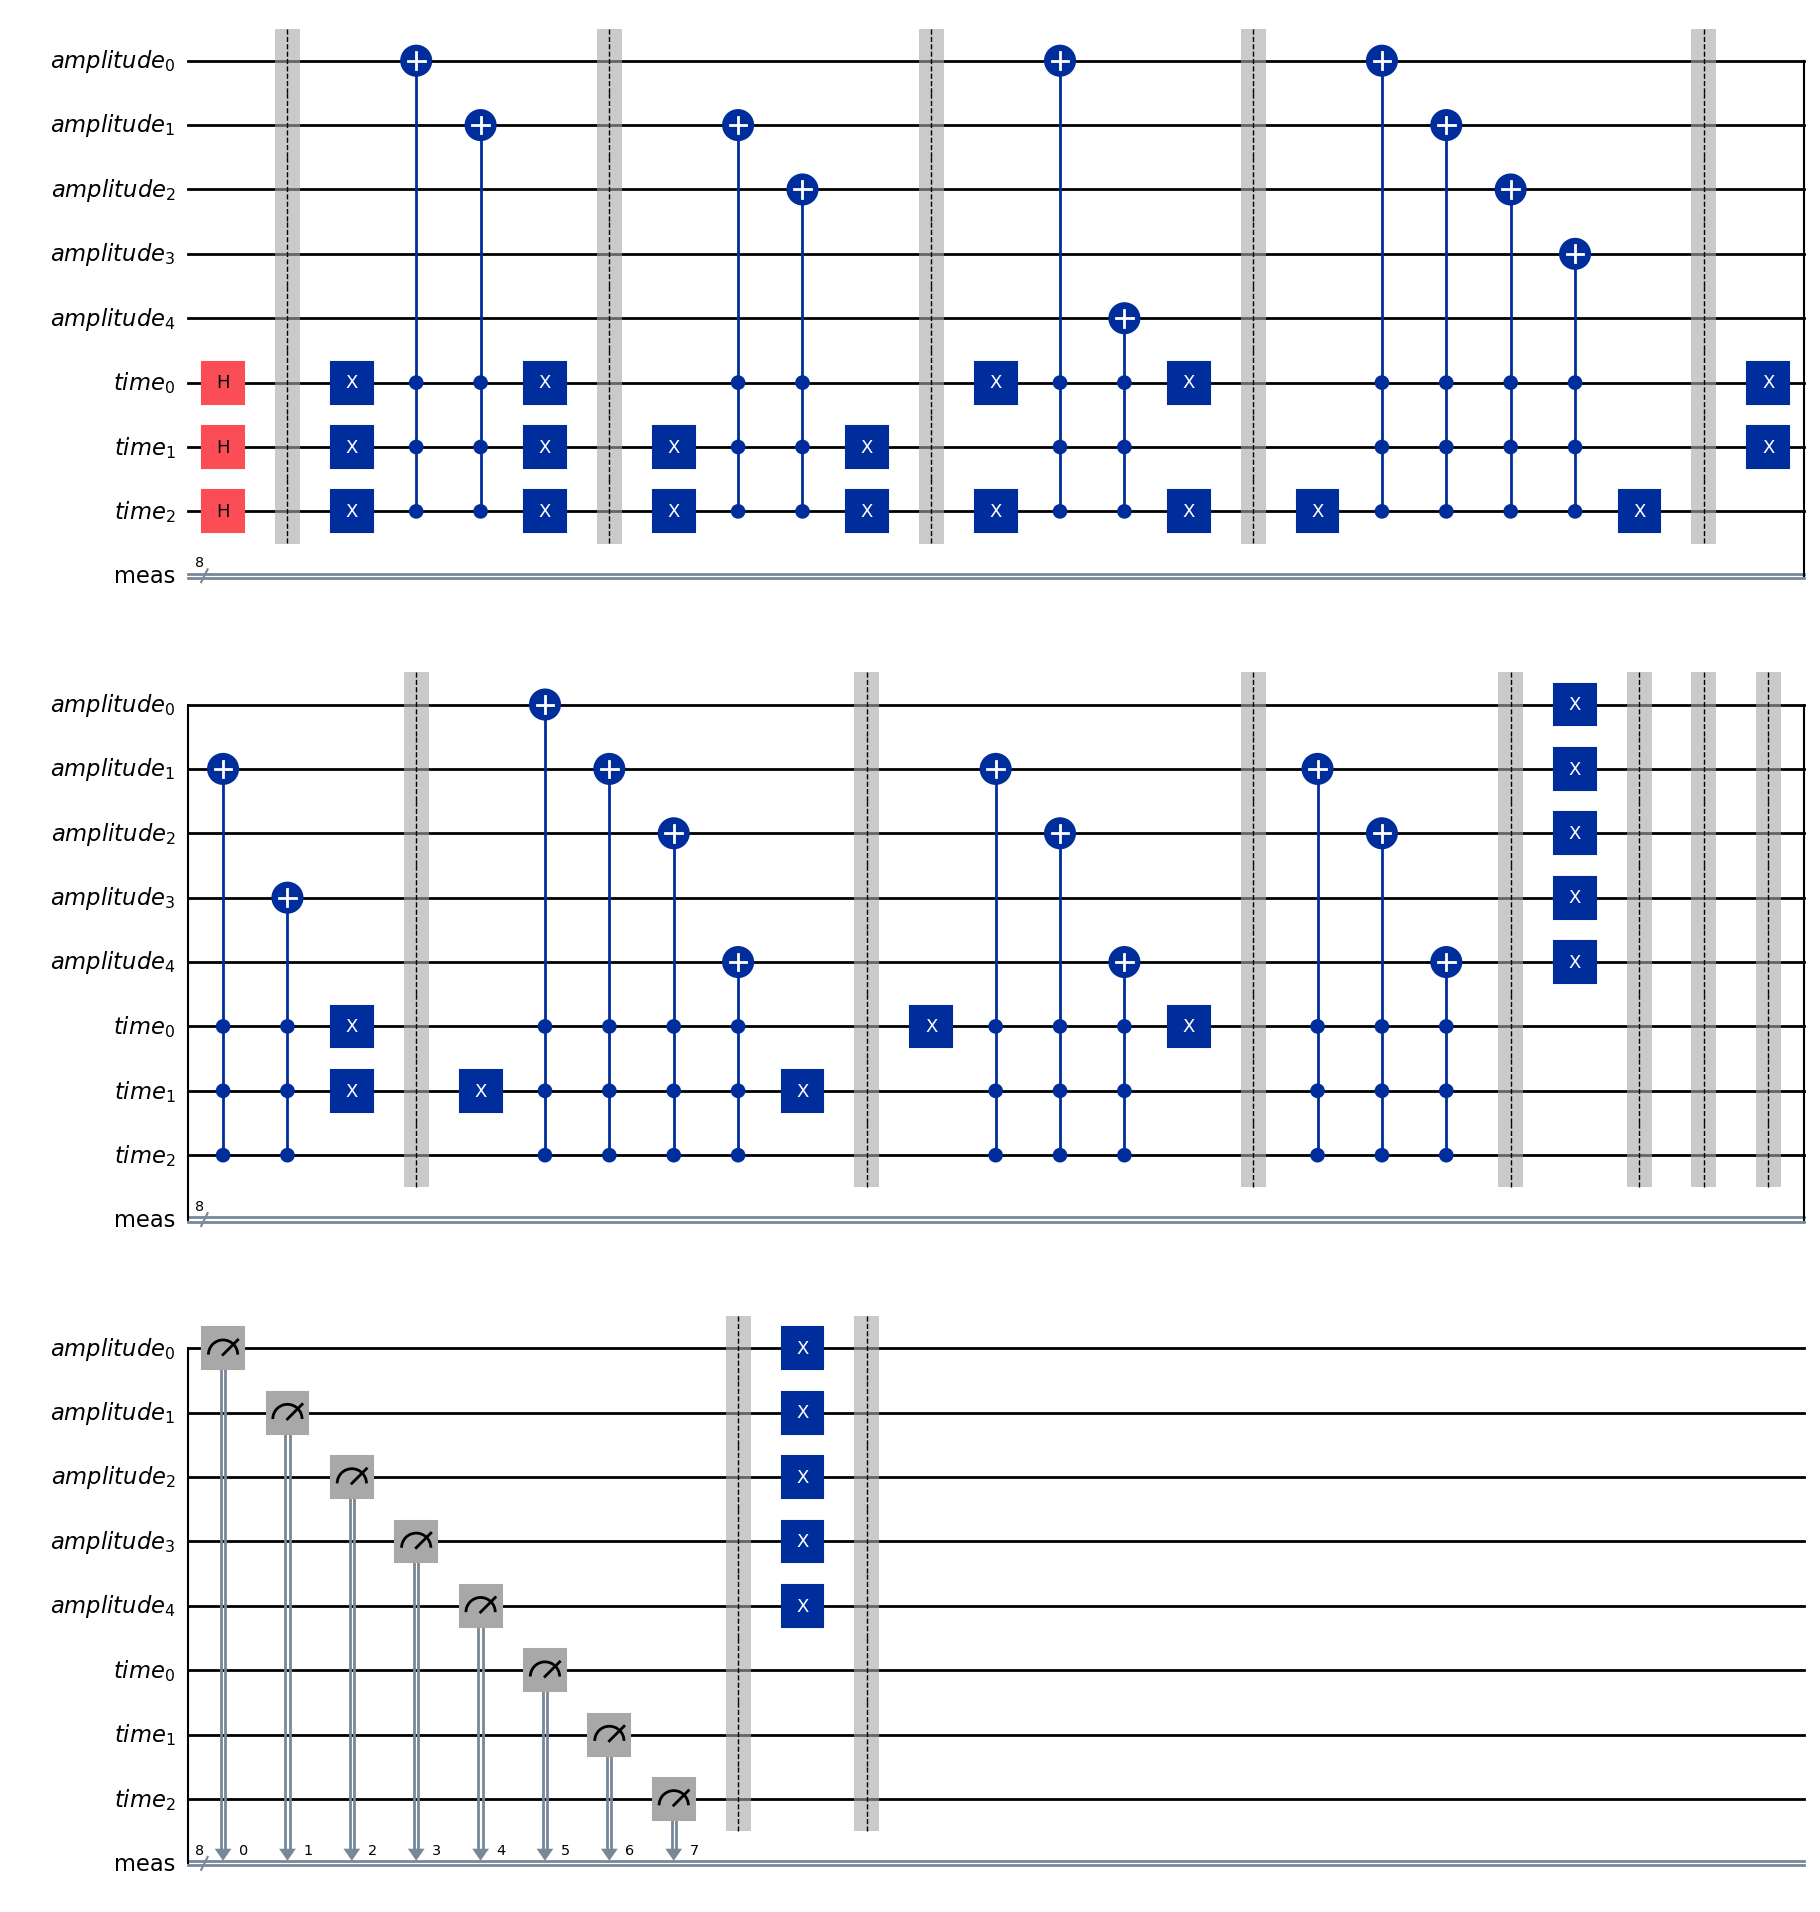

In [6]:
# --- APPLY X GATES ---
# Add barrier
encoded_circuit.barrier()

# Apply X gates to `qubit_depth` qubits in the circuit (amplitude qubits)
for i in range(qubit_depth):
    encoded_circuit.x(i)  # apply X gates to the amplitude qubits

# Add barrier
encoded_circuit.barrier()

print("\nEncoded Circuit with Amplitude Inversion:")
encoded_circuit.draw(output='mpl')

4. Decoded signal and plot comparison:


Original Signal:
[ 0.20223002  0.41614516 -0.95883101  0.9398197   0.66488528 -0.57532178
 -0.63635007 -0.63319098]

Decoded Signal:
[-0.25   -0.4375  0.875  -1.     -0.6875  0.5     0.5625  0.5625]

Plot:


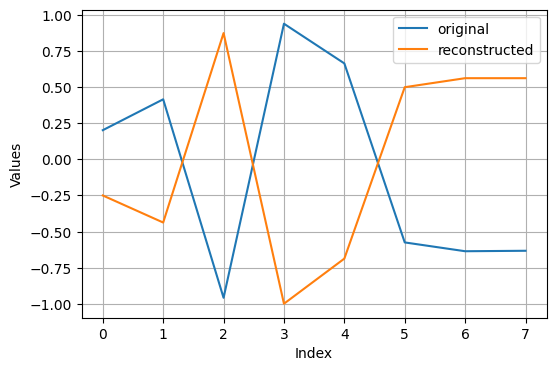

In [8]:
decoded_signal = scheme.decode(encoded_circuit) # decode the the signal after effect application

print("\nOriginal Signal:")
print(signal)
print("\nDecoded Signal:")
print(decoded_signal)
print("\nPlot:")
plot([signal, decoded_signal])